<a href="https://colab.research.google.com/github/nitishast/TF/blob/master/Image_Classifier_Using_Sequential_API_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import numpy as np
import pandas as pd
import matplotlib as mp
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.__version__

'2.2.4-tf'

### Loading the MNIST Dataset

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

### In scikit learn same image is represented as 1D array of 784 but in keras each is 28x28 array

In [5]:
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
print (X_train_full.shape)
print (X_train_full.dtype)

(60000, 28, 28)
uint8


### Since we will optimise the network by using Gradient descent, we must scale the input feature to 0-1. Can be done by dividing by max feature 255

In [0]:
# Creating a Validation set 
X_valid, X_train = X_train_full[:5000]/255.0 , X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000]/255.0 , y_train_full[5000:]

In [0]:
class_names = ["T-shirt/top" , "Trouser" , " Pullover", "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Bag" , "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Coat'

## Building a sequential model

In [10]:
from keras.models import Sequential
from keras.layers import Flatten,Dense

Using TensorFlow backend.


#### The shape of the weight matrix depends on the number of inputs.
This is why it is recommended to specify the input_shape when
creating the first layer in a Sequential model. However, if you do
not specify the input shape, it’s okay: Keras will simply wait until it
knows the input shape before it actually builds the model. This will
happen either when you feed it actual data (e.g., during training),
or when you call its build() method. Until the model is really
built, the layers will not have any weights, and you will not be able
to do certain things (such as print the model summary or save the
model), so if you know the input shape when creating the model, it
is best to specify it

In [0]:
model = keras.models.Sequential()
#Input Layer
model.add(keras.layers.Flatten(input_shape=[28,28])) # Just flattens the image vector into a 1D array of 784 by computing X.reshape(-1,1)
#Fully connected layers -Dense
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))

#Output layer
model.add(keras.layers.Dense(10,activation="softmax")) #10 neurons -- 1 neuron per class. Siince there are 10 class hence 10 neurons



In [12]:
model.summary() ## Here None is the batch_size which it can be anything.
## Param is the number of trainable number of parameters in the layer
## 1st dense layer has (784[input shape]x300[neurons]) connection weights (+) 300 bias term[one bais term per neuron] == 235500
## 2nd dense layer has (300x100) + 100 bais terms = 30100 params
## 3rd dense layer has (100x10) + 10 bias term == 1010 params

#------------>> Lots of flexibility also means higher risk of overfitting especially if training data is less.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Getting weights and bias for each layers

In [13]:
model.layers[1].name

'dense'

In [0]:
weights, bias = model.layers[1].get_weights()

In [15]:
weights


array([[ 0.00902348, -0.0585485 ,  0.0347058 , ...,  0.07062978,
        -0.02420282, -0.01307439],
       [-0.05897076,  0.02526692, -0.00667254, ...,  0.01378721,
         0.03017431,  0.03690797],
       [-0.00503176,  0.01924763, -0.05464052, ...,  0.06394519,
        -0.06506491,  0.04878352],
       ...,
       [-0.039298  , -0.04664085,  0.04251132, ..., -0.06302761,
         0.06517281, -0.03868479],
       [-0.04728676, -0.01263224, -0.06519305, ..., -0.01685577,
        -0.00062519, -0.02149972],
       [ 0.03839463,  0.0475998 , -0.0159074 , ...,  0.0359895 ,
        -0.07098503,  0.05277206]], dtype=float32)

In [16]:
print (weights.shape)
print (bias.shape)

(784, 300)
(300,)


### In compile method we define the loss methods like cross-entropy for classification and MSE/Huber for regression tasks. Also we need to specify the optimizer and the metrics

#### Loss:

> Sparse crossentropy loss because we the labels to predict are sparse, and exclusive. if the labels to predict we binary categorical_crossentropy loss.

Activiation:

> Softmax because multiclass classification. if we were using Binary loss then sigmoid

Optimizer:

>Different type of optimizer can be used. SGD simply means stociastic gradient descent for backpropogation. 

Metric:

>Accuracy as this is a classification task



In [0]:
model.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [28]:
## Epocs of 1 will not be sufficient for convergence hence use the epocs suitable.
model.fit(X_train,y_train, epochs=10,validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 96us/sample - loss: 0.3550 - accuracy: 0.8709 - val_loss: 9.3503 - val_accuracy: 0.0778
Epoch 2/10
55000/55000 [==============================] - 5s 90us/sample - loss: 0.3176 - accuracy: 0.8828 - val_loss: 10.0900 - val_accuracy: 0.0608
Epoch 3/10
55000/55000 [==============================] - 5s 93us/sample - loss: 0.2974 - accuracy: 0.8892 - val_loss: 10.2061 - val_accuracy: 0.0836
Epoch 4/10
55000/55000 [==============================] - 5s 92us/sample - loss: 0.2786 - accuracy: 0.8963 - val_loss: 10.8811 - val_accuracy: 0.0832
Epoch 5/10
55000/55000 [==============================] - 5s 90us/sample - loss: 0.2640 - accuracy: 0.9016 - val_loss: 11.2927 - val_accuracy: 0.0782
Epoch 6/10
55000/55000 [==============================] - 5s 87us/sample - loss: 0.2523 - accuracy: 0.9048 - val_loss: 13.1679 - val_accuracy: 0.0688
Epoch 7/10
55000/55000 [============================

In [29]:
acc = pd.DataFrame(model.history.history)
acc.head()

,loss,accuracy,val_loss,val_accuracy
0,0.354985,0.870945,9.350278,0.0778
1,0.317596,0.882782,10.089960,0.0608
2,0.297392,0.889200,10.206111,0.0836
3,0.278604,0.896309,10.881144,0.0832
4,0.264023,0.901636,11.292747,0.0782


In [0]:
import matplotlib.pyplot as plt


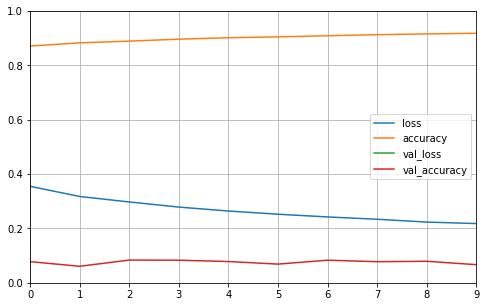

In [31]:
acc.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [0]:
X_new = X_test[:10]

y_prob = model.predict(X_new)

In [39]:
y_prob.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.71, 0.  , 0.29, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ]],
      dtype=float32)

In [40]:
## Directly predicting classes of the set

y_pred_class = model.predict_classes(X_new)
y_pred_class


array([9, 2, 1, 1, 0, 1, 4, 4, 5, 7])

In [41]:
np.array(class_names)[y_pred_class]

array(['Ankle boot', ' Pullover', 'Trouser', 'Trouser', 'T-shirt/top',
       'Trouser', 'Coat', 'Coat', 'Sandal', 'Sneaker'], dtype='<U11')

In [42]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 67us/sample - loss: 82.2718 - accuracy: 0.8306


[82.27183650671185, 0.8306]

In [0]:
# This means that model is 83% accurate when predictiin on test set.